In [ ]:
# Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


### Consigna 3

Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas en el problema detallando características, comportamiento y rango de variación.

Debe incluir:
- Análisis y decisión sobre datos faltantes.
- Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
- Codificación de variables categóricas (si se van a utilizar para predicción).
- Matriz de correlación de variables.
- Estandarización o escalado de datos.
- Validación cruzada train - test.

Realizar una división del conjunto de datos en conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir validación, que luego será útil) en el MOMENTO donde ustedes lo crean adecuado.



The amount of missing data in each column
CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64


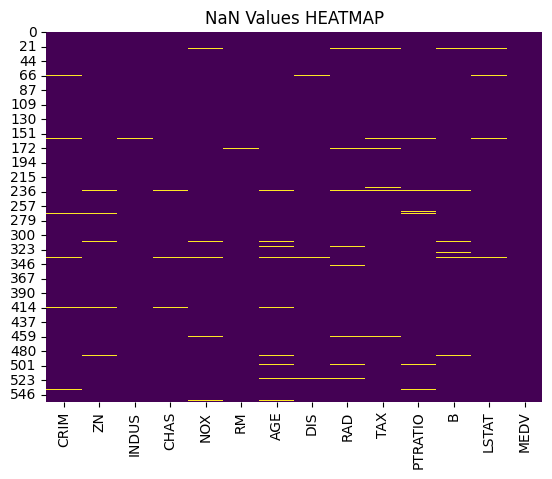

In [ ]:
# Load the dataset
house_prices = pd.read_csv("./house-prices-tp.csv")

# Display the sum of missing values for each column
house_sum_null = house_prices.isnull().sum()
print('The amount of missing data in each column')
print(house_sum_null)

# Remove rows where the target column 'MEDV' contains NaN values
house_prices = house_prices.dropna(subset=['MEDV'])

# Visualize the remaining missing data as a heatmap
sns.heatmap(house_prices.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values HEATMAP')
plt.show()

# This heatmap was made in order to visualise in an image the damage that the dataframe has, i.e. the yellow lines represent those places where there is a NaN, and thus to know row and column.

In [3]:
'''
We separate the features (independent variables) from the target (dependent variable) as follows:
- X contains all the data except the column we want to predict (MEDV).
- y holds the values of the column to predict (MEDV).
'''
X = house_prices.drop('MEDV', axis=1)
y = house_prices['MEDV']

'''
Next, we split the dataset into training and testing sets:
- The data is split with 20% for testing and 80% for training.
- We use a random seed (random_state=42) to ensure reproducibility.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

HISTOGRAM



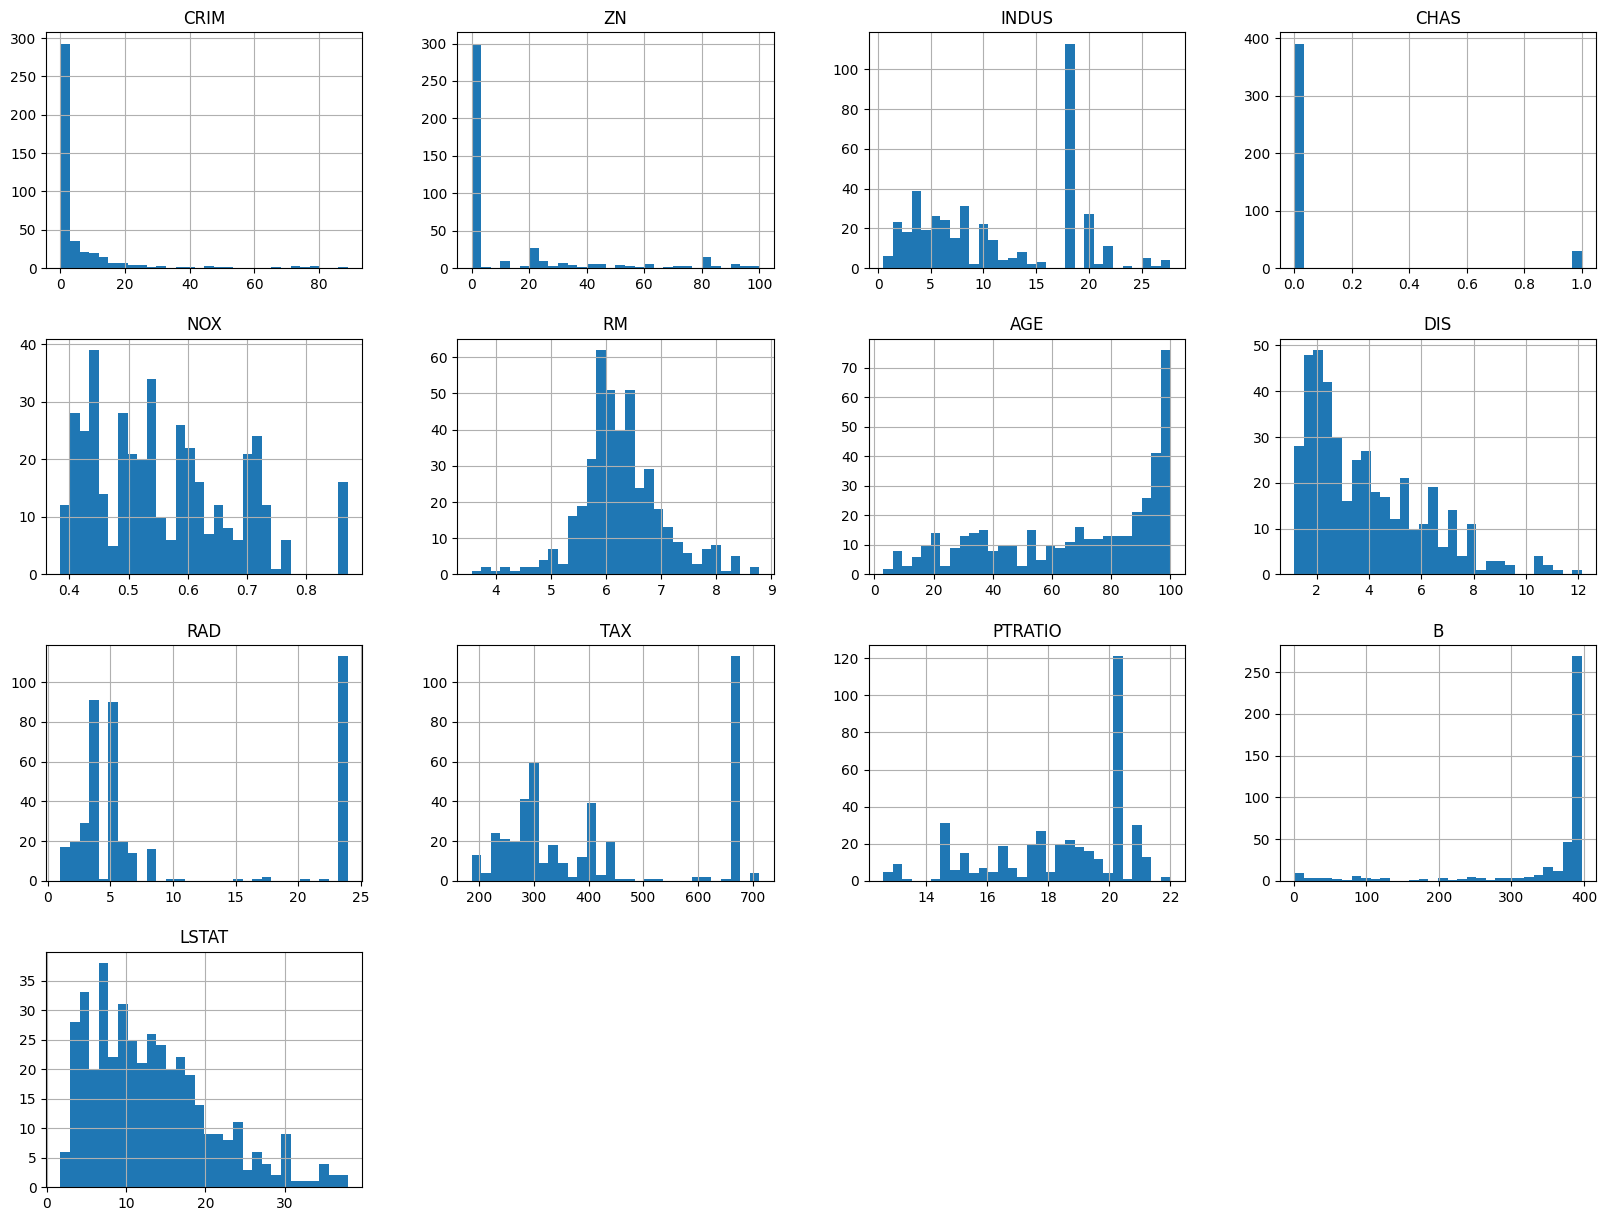


PAIRPLOT



/home/roberto-orazi/repositories/AA1-TUIA-Frattini-Gallardo-Orazi/AA1-TP1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roberto-orazi/repositories/AA1-TUIA-Frattini-Gallardo-Orazi/AA1-TP1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roberto-orazi/repositories/AA1-TUIA-Frattini-Gallardo-Orazi/AA1-TP1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roberto-orazi/repositories/AA1-TUIA-Frattini-G

KeyboardInterrupt: 

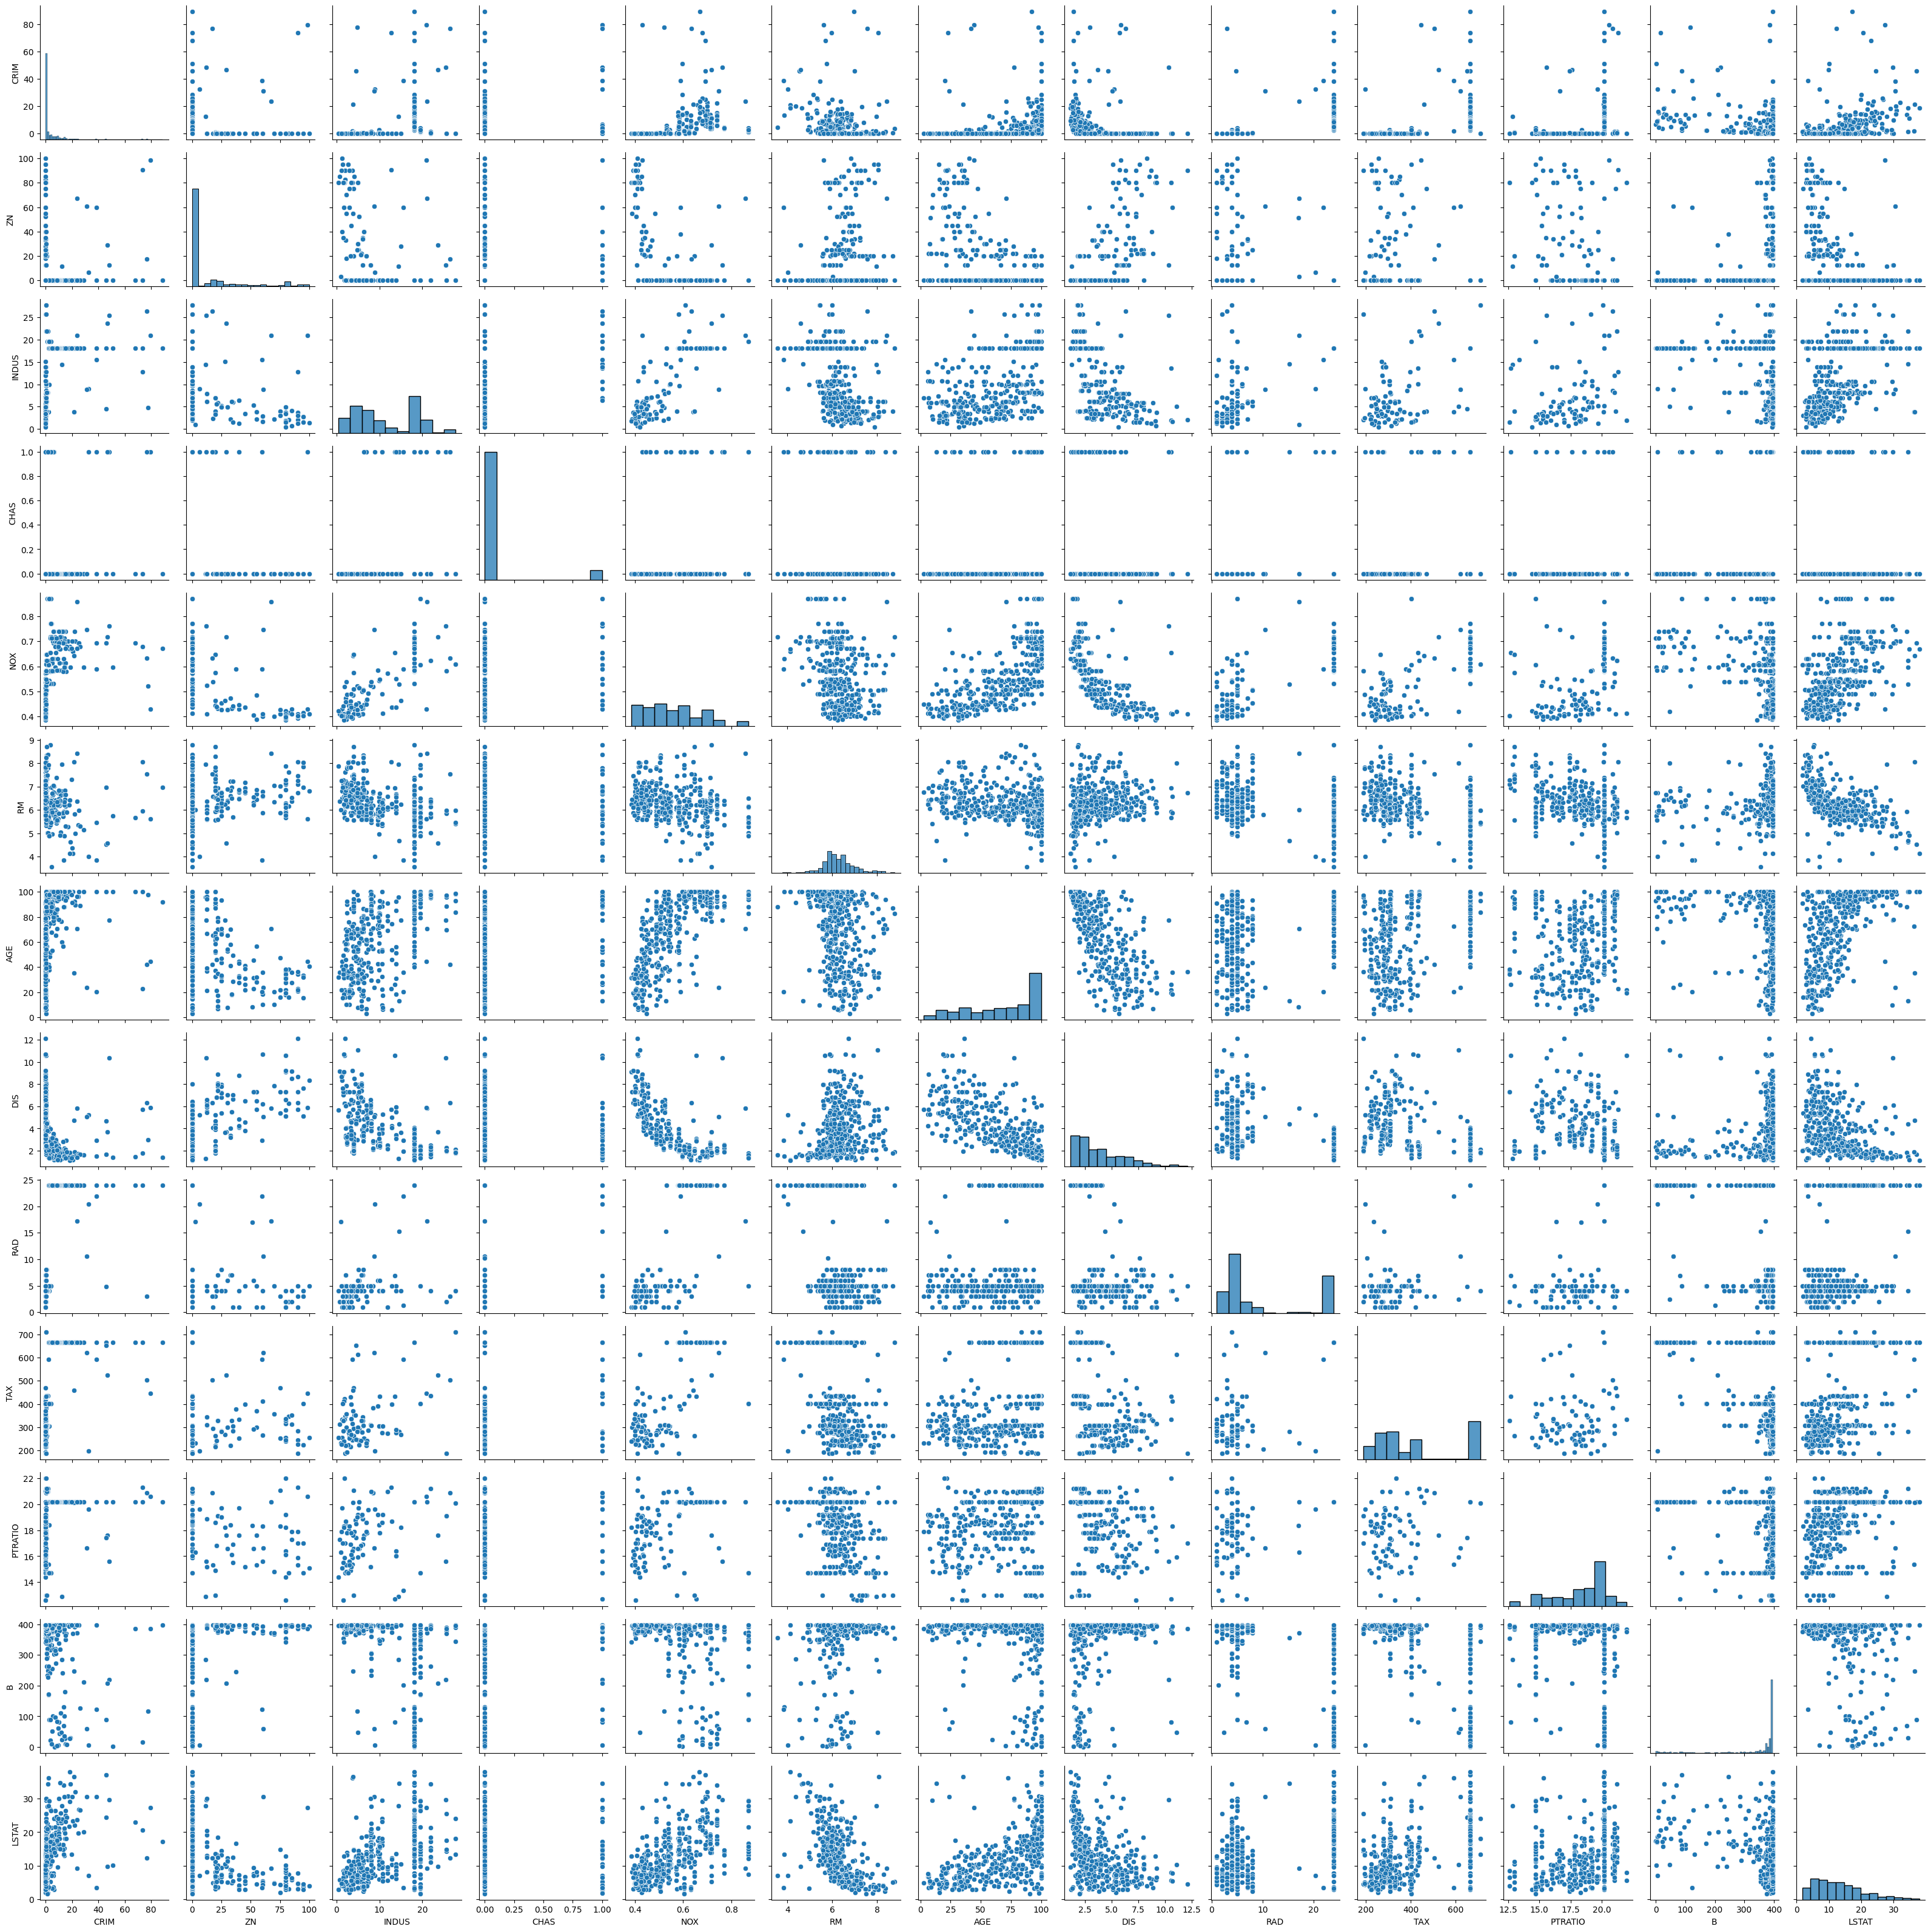

In [25]:
# Histograms for each variable except 'MEDV'
print('HISTOGRAM')
print('')
X_train.hist(bins=30, figsize=(20, 15))
plt.show()

# Pairplot to visualize relationships between variables, excluding 'MEDV'
print('')
print('PAIRPLOT')
print('')
sns.pairplot(X_train)
plt.show()

# Boxplots for each variable except 'MEDV'
print('')
print('BOXPLOT')
print('')
X_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(20, 15))
plt.show()

# First, distribution graphs were made, i.e. all histogram graphs were made, in order to analyse each of the variables and to understand what form each one has.
# For the graphs of CRIM,ZN,AGE,B we see asymmetric and unimodal distributions, with a mode well above the other values.
# CHAS is notoriously a categorical variable with two values 0 and 1.
# TAX, RAD, INDUS, PTRATIO are unimodal distributions, which by generating ranges could be considered categorical variables if necessary, these possibly having some kind of relationship.
# NOX, DIS, LSTAT are not very well defined and simple asymmetric distributions, so using mean, median or mode may not be optimal when trying to define these distributions.
# They seem to have a similar distribution, so they may be related to each other.
# RM is a very bell-shaped function, i.e. its mean could be representative of this variable.

# In the second instance, we plotted 1-to-1 point plots between all variables.
# This graph gives us an idea of possible relationships between variables that have definite shapes.
# However, we will focus only on the linear relationships between variables, so that the heatmap performed later will give us more information about the linearity of the variables.

# The last plots made in this fragment are boxplot plots, which will help us to add information to the distributions such as the presence of outliers.
# As we can see, some variables such as CRIM, ZN, RM, DIS, B and LSTAT have outliers.
# The case of CHAS is particular since it only indicates that the values of 1 are the "outliers". This only tells us that since it is a categorical variable it is more common to find the value of 0 than 1, which was clearly seen in the distribution.

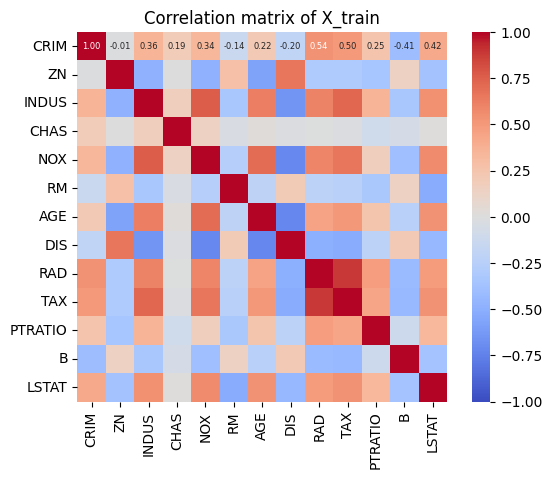

In [26]:
# Calculate the correlation matrix for the training set
corr_train = X_train.corr()
# Generate a heatmap to visualize the correlations in X_train
sns.heatmap(corr_train, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,square=True,fmt='.2f',annot_kws = {'size': 6})
plt.title('Correlation matrix of X_train')
plt.show()

# El el heatmap podemos ver relaciones lineales entre variables
# CRIM relations: RAD (+), TAX(+)
# ZN relations: INDUS (-), NOX(-), AGE(-), DIS(+)
# INDUS relations: ZN (-), NOX(+), AGE(+), DIS(-), RAD(+), TAX(+), LSTAT(+)
# CHAS relations: does not possess
# NOX relations: ZN(-), INDUS(+), AGE(+), DIS(-), RAD(+), TAX(+), LSTAT(+)
# MR relations: LSTAT(-)
# AGE relations: ZN(-), INDUS(+),NOX(+), DIS(-), RAD(+),TAX(+),LSTAT(+)
# DIS relations: ZN(+),INDUS(-),NOX(-),AGE(-),RAD(-),TAX(-),LSTAT(-)
# RAD relations: CRIM(+), INDUS(+), NOX(+), AGE(+), DIS(-),TAX(+), PTRATIO(+),B(-),LSTAT(+)
# TAX relations: CRIM(+), INDUS(+), NOX(+), AGE(+), DIS(-),TAX(+), PTRATIO(+),B(-),LSTAT(+)
# PTRATIO relations: RAD(+), TAX(+)
# B relations: RAD(-),TAX(-)
# LSTAT relations: CRIM(+),INDUS(+),NOX(+),RM(-),AGE(+),DIS(-),RAD(+),TAX(+)

# It can be easily seen that the most related variables are RAD and TAX, i.e. they are the most related, which could be united in a single variable.

In [ ]:
def KNN_method(X_train=X_train,X_test=X_test):
  # Imputation of missing values using the "KNN METHOD"
  knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

  # Apply KNN imputation
  X_train_imputed = knn_imputer.fit_transform(X_train)
  X_test_imputed = knn_imputer.transform(X_test)

  # Standardize the imputed data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_imputed)
  X_test_scaled = scaler.transform(X_test_imputed)
  return X_train_scaled , X_test_scaled

# First we impute the missing values using Knn, then we scale the features using standardScaler.
# Finally we train the model with the imputed and scaled data.

In [8]:
X_train_scaled , X_test_scaled = KNN_method()

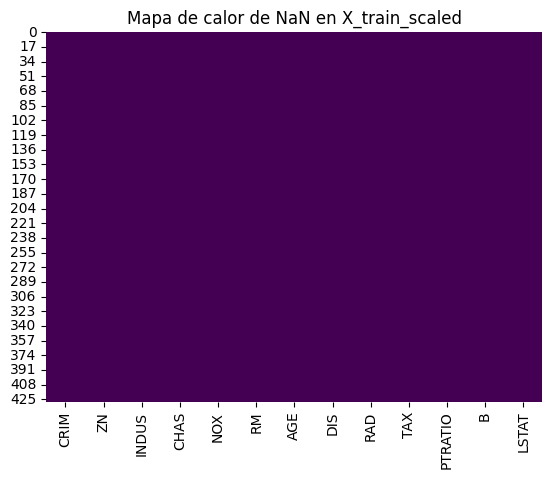

In [9]:
# Convert X_train_scaled back into a DataFrame with the original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Generate a heatmap to visualize any remaining NaN values after imputation
sns.heatmap(X_train_scaled_df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de NaN en X_train_scaled')
plt.show()

### Consigna 4
Implementar la solución del problema de regresión con regresión lineal múltiple.
- Probar con el método LinearRegression.
- Probar con métodos de gradiente descendiente. ¿Algún cambio? Incorporar gráficas de Error vs Iteraciones (loss vs epochs). Agregar comentarios.
- Probar con métodos de regularización (Lasso, Ridge, Elastic Net).
- Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE, elegir) tanto para entrenamiento como para prueba. ¿Por qué para ambos conjuntos?

¿Creen que han conseguido un buen fitting?

In [ ]:
# Linear Regression model

# Linear Regression model creation
linear_model = LinearRegression()

# Training model
linear_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Calculate RMSE manually
train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

# Calculate R-squared metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {train_rmse:.2f}, Test MSE: {test_rmse:.2f}')
print(f'Train R²: {train_r2:.2f}, Test R²: {test_r2:.2f}')

# Obtain the coefficients of the model
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print("Model coefficients:", coefficients)
print("Model intercept:", intercept)

Train RMSE: 5.47, Test MSE: 7.31
Train R²: 0.67, Test R²: 0.36
Model coefficients: [ 0.33691499  1.74574883  0.19394627  1.74753352 -2.04622871  2.67731581
 -1.26550291 -4.12454684  1.43696124 -1.77539293 -1.9267819   0.58175029
 -3.54589665]
Model intercept: 22.578842017615816


Epoch 1/50 - Loss: 6.6417
Epoch 2/50 - Loss: 4.9706
Epoch 3/50 - Loss: 3.7633
Epoch 4/50 - Loss: 2.9333
Epoch 5/50 - Loss: 2.3275
Epoch 6/50 - Loss: 1.9286
Epoch 7/50 - Loss: 1.6557
Epoch 8/50 - Loss: 1.4675
Epoch 9/50 - Loss: 1.3653
Epoch 10/50 - Loss: 1.2753
Epoch 11/50 - Loss: 1.2415
Epoch 12/50 - Loss: 1.2084
Epoch 13/50 - Loss: 1.1908
Epoch 14/50 - Loss: 1.1728
Epoch 15/50 - Loss: 1.1595
Epoch 16/50 - Loss: 1.1516
Epoch 17/50 - Loss: 1.1432
Epoch 18/50 - Loss: 1.1373
Epoch 19/50 - Loss: 1.1321
Epoch 20/50 - Loss: 1.1257
Epoch 21/50 - Loss: 1.1204
Epoch 22/50 - Loss: 1.1146
Epoch 23/50 - Loss: 1.1094
Epoch 24/50 - Loss: 1.1042
Epoch 25/50 - Loss: 1.0991
Epoch 26/50 - Loss: 1.0952
Epoch 27/50 - Loss: 1.0902
Epoch 28/50 - Loss: 1.0858
Epoch 29/50 - Loss: 1.0819
Epoch 30/50 - Loss: 1.0778
Epoch 31/50 - Loss: 1.0746
Epoch 32/50 - Loss: 1.0719
Epoch 33/50 - Loss: 1.0687
Epoch 34/50 - Loss: 1.0657
Epoch 35/50 - Loss: 1.0626
Epoch 36/50 - Loss: 1.0601
Epoch 37/50 - Loss: 1.0565
Epoch 38/5

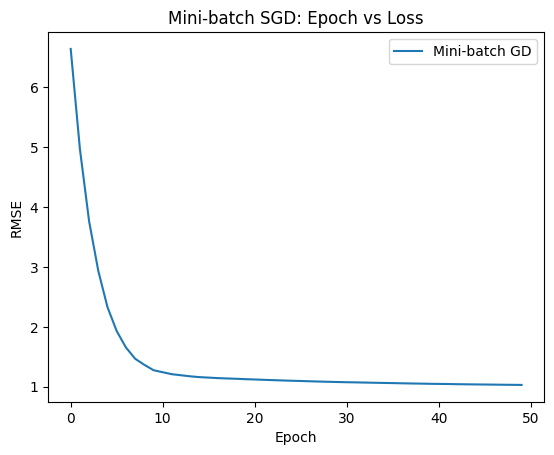

In [ ]:
# Example data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Parameters
epochs = 50
learning_rate = 0.01
batch_size = 16

# Initialization of weights and bias with correct dimensions
w = np.random.randn(1, 1)
b = np.random.randn(1)

# Prediction function
def predict(X, w, b):
    return X @ w + b

# Function to calculate RMSE
def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to train with SGD
def sgd(X, y, epochs, learning_rate, batch_size=None):
    global w, b
    n = len(y)
    loss_history = []

    for epoch in range(epochs):
        if batch_size:
            # Random mix for mini-batch
            indices = np.random.permutation(n)
            X, y = X[indices], y[indices]

        for i in range(0, n, batch_size if batch_size else n):
            X_batch = X[i:i + batch_size] if batch_size else X
            y_batch = y[i:i + batch_size] if batch_size else y
            y_pred = predict(X_batch, w, b)
            error = y_pred - y_batch
            # Gradients
            w_grad = (2 / len(y_batch)) * X_batch.T @ error
            b_grad = (2 / len(y_batch)) * np.sum(error)
            # Update of weights and bias
            w -= learning_rate * w_grad
            b -= learning_rate * b_grad

        # Calculation of the loss in each epoch
        y_train_pred = predict(X, w, b)
        loss = compute_rmse(y, y_train_pred)
        loss_history.append(loss)

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f}")

    return loss_history

# Selection of SGD type
batch_type = "mini-batch"  # Switch between "batch", "mini-batch", "stochastic"

if batch_type == "batch":
    batch_size = len(y)
elif batch_type == "mini-batch":
    batch_size = 16
elif batch_type == "stochastic":
    batch_size = 1

# Loss training and visualisation
loss_history = sgd(X, y, epochs, learning_rate, batch_size)
plt.plot(range(epochs), loss_history, label=f"{batch_type.capitalize()} GD")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title(f"{batch_type.capitalize()} SGD: Epoch vs Loss")
plt.legend()
plt.show()

'''
We chose to use the mini-batch gradient descent because it provides faster
convergence than the batch gradient descent, which requires processing
the entire dataset at each update, making it slower. In addition, mini-batch
reduces the inherent noise of stochastic gradient descent (SGD), which, while
faster in terms of frequent updates, introduces more variability into the
optimisation process, which can hinder accuracy.
Therefore, the mini-batch is the most suitable option for balancing convergence speed and model stability during training.
'''

In [ ]:
# Creation of the SGDRegressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

# Training the model
sgd_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_sgd = sgd_model.predict(X_train_scaled)
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Calculate RMSE manually
train_rmse_sgd = np.sqrt(np.mean((y_train - y_train_pred_sgd) ** 2))
test_rmse_sgd = np.sqrt(np.mean((y_test - y_test_pred_sgd) ** 2))

# Calculate R² metrics
train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

print(f'Train RMSE (SGD): {train_rmse_sgd:.2f}, Test RMSE (SGD): {test_rmse_sgd:.2f}')
print(f'Train R² (SGD): {train_r2_sgd:.2f}, Test R² (SGD): {test_r2_sgd:.2f}')

# Obtain the coefficients of the model
coefficients = sgd_model.coef_
intercept = sgd_model.intercept_

print("Model coefficients:", coefficients)
print("Model intercept:", intercept)

Train RMSE (SGD): 5.47, Test RMSE (SGD): 7.31
Train R² (SGD): 0.67, Test R² (SGD): 0.36
Model coefficients: [ 0.33392507  1.7069871   0.13114205  1.73054746 -2.00103317  2.63762495
 -1.26299336 -4.11193448  1.2935392  -1.5700511  -1.88954791  0.58342528
 -3.54858035]
Model intercept: [22.57709775]


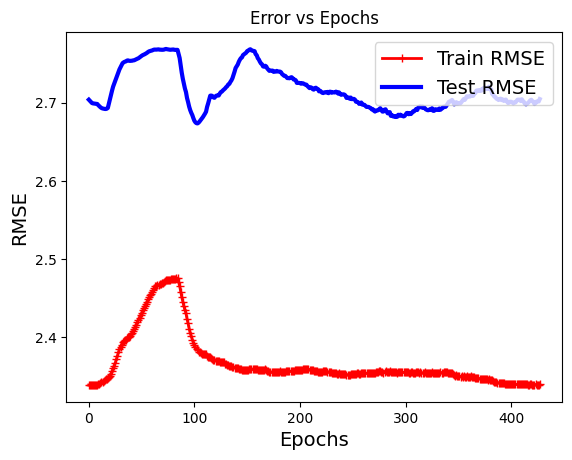

In [13]:
# Initialize lists to store training and testing errors
train_errors, test_errors = [], []

# Iterate through different sizes of training data
for m in range(1, len(X_train_scaled) + 1):  # Ensure inclusive range
    sgd_model.partial_fit(X_train_scaled[:m], y_train[:m])
    y_train_predict = sgd_model.predict(X_train_scaled)
    y_test_predict = sgd_model.predict(X_test_scaled)

    # Manually calculate roote mean squared error
    train_rmse = np.sqrt(np.mean((y_train - y_train_predict) ** 2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_predict) ** 2))

    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Plotting RMSE for training and testing errors
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train RMSE")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Error vs Epochs")
plt.show()


In [ ]:
"""
We can see that the coefficients of both models are very similar.
This indicates that the models fit almost equally well and also in the error vs iterations
graph the value in few iterations has the same value that converges with increasing epochs,
so a downward gradient converges to almost the same result as the regression model.
"""

In [ ]:
# Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)
coefficients_lasso = lasso_model.coef_
intercept_lasso = lasso_model.intercept_

# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)
coefficients_ridge = ridge_model.coef_
intercept_ridge = ridge_model.intercept_

# Elastic Net
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)
y_train_pred_elastic = elastic_model.predict(X_train_scaled)
y_test_pred_elastic = elastic_model.predict(X_test_scaled)
coefficients_elastic = elastic_model.coef_
intercept_elastic = elastic_model.intercept_

# Metrics
models = {
    "Lasso": (y_train_pred_lasso, y_test_pred_lasso, coefficients_lasso, intercept_lasso),
    "Ridge": (y_train_pred_ridge, y_test_pred_ridge, coefficients_ridge, intercept_ridge),
    "ElasticNet": (y_train_pred_elastic, y_test_pred_elastic, coefficients_elastic, intercept_elastic)
}

for name, (y_train_pred, y_test_pred, coefficients, intercept) in models.items():
    # Manually calculate Roote mean squared error
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    # Calculate R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"{name} Model coefficients:", coefficients)
    print(f"{name} Model intercept:", intercept)
    print(f'{name} - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
    print(f'{name} - Train R2: {train_r2}, Test R2: {test_r2}')
    print("")


Lasso Model coefficients: [ 0.17870058  1.52839271 -0.          1.69720937 -1.69849936  2.63382668
 -1.0989817  -3.59432251  0.49893637 -0.86552375 -1.77172455  0.44903556
 -3.5655464 ]
Lasso Model intercept: 22.578842017615816
Lasso - Train MSE: 5.49857889397739, Test MSE: 7.214765534450153
Lasso - Train R2: 0.6694435916977818, Test R2: 0.37415237808117896

Ridge Model coefficients: [ 0.33490185  1.72945529  0.17665572  1.74544585 -2.02125514  2.67572107
 -1.25931533 -4.08764731  1.40147799 -1.73697667 -1.92140457  0.58402275
 -3.53958237]
Ridge Model intercept: 22.578842017615816
Ridge - Train MSE: 5.466696809647619, Test MSE: 7.29110115726442
Ridge - Train R2: 0.6732657698128295, Test R2: 0.36083879055546453

ElasticNet Model coefficients: [ 0.20687176  1.39409701 -0.03208619  1.65117121 -1.51158817  2.63172636
 -1.084734   -3.2221459   0.60932804 -0.97953101 -1.77406896  0.5495995
 -3.38921461]
ElasticNet Model intercept: 22.578842017615816
ElasticNet - Train MSE: 5.51572266015792,

Having a Train/Test of 80/20 we see that the R2 of Train is "High" so we do not consider that there is underfitting.
However, the R2 of train is greater than the R2 of test
and MSE of train is lower than MSE of train which would indicate that there is OVERFITTING.

So in conclusion we think we don't have a good fitting

To solve this, we again went back to the beginning and tried smaller Train size values (manually).
We observed that doing a 50/50 crosstrain was a much better fit than the initial 80/20.

In [15]:
def print_metrics(y_true, y_pred, dataset_type):
    """
    Calculate and print regression evaluation metrics.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - dataset_type: str, type of dataset (e.g., 'Train' or 'Test') for labeling output

    Metrics Calculated:
    - MSE: Mean Squared Error
    - RMSE: Root Mean Squared Error
    - MAE: Mean Absolute Error
    - R²: Coefficient of Determination
    """

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)  # Measures average squared difference between actual and predicted values

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)  # Provides the square root of the average squared differences, in the same unit as the target variable

    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(np.abs(y_true - y_pred))  # Measures the average magnitude of errors in a set of predictions, without considering their direction

    # Calculate R² Score (Coefficient of Determination)
    r2 = r2_score(y_true, y_pred)  # Indicates how well the predicted values approximate the actual values, ranges from 0 to 1

    # Print the calculated metrics for the specified dataset
    print(f'{dataset_type} - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')

# Print metrics for the training dataset
print_metrics(y_train, y_train_pred, 'Train')

# Print metrics for the test dataset
print_metrics(y_test, y_test_pred, 'Test')



Train - MSE: 30.423196463779558, RMSE: 5.51572266015792, MAE: 3.769791957338217, R2: 0.6673791251169672
Test - MSE: 48.9125551731346, RMSE: 6.993751151787902, MAE: 4.384825968261768, R2: 0.41190902691813935


In [22]:
# Definition of the Stochastic Gradient Descent (SGD) regression model
sgd = SGDRegressor()

# Hyperparameter grid for optimizing the SGD model
param_grid_sgd = {
    'alpha': np.logspace(-100, 100, num=1000), # Probar con 100000
    'max_iter': [1000, 2000, 3000],  # Maximum number of iterations for the solver
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}

# Configuration of GridSearchCV to find the best hyperparameters using cross-validation
grid_search_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, scoring='neg_mean_squared_error')

# Model training with the training dataset
grid_search_sgd.fit(X_train_scaled, y_train)

# Output the best hyperparameters found by GridSearchCV
print("Best hyperparameters for SGD:", grid_search_sgd.best_params_)

# Evaluation of the model with the best hyperparameters
best_sgd = grid_search_sgd.best_estimator_  # Retrieve the best model
y_train_pred_best_sgd = best_sgd.predict(X_train_scaled)  # Predictions on the training data
y_test_pred_best_sgd = best_sgd.predict(X_test_scaled)  # Predictions on the test data

# Print metrics for the optimized SGD model on training data
print_metrics(y_train, y_train_pred_best_sgd, 'Train (SGD Optimized)')

# Print metrics for the optimized SGD model on test data
print_metrics(y_test, y_test_pred_best_sgd, 'Test (SGD Optimized)')


Best hyperparameters for SGD: {'alpha': 0.03151363484866534, 'max_iter': 3000, 'tol': 0.001}
Train (SGD Optimized) - MSE: 30.095366774954773, RMSE: 5.485924423007919, MAE: 3.7733080847136335, R2: 0.6709633309396312
Test (SGD Optimized) - MSE: 50.90846346301645, RMSE: 7.1350167107734555, MAE: 4.452076934814196, R2: 0.38791159631521976


In [23]:
# Model definition for Lasso regression
lasso = Lasso()

# Hyperparameter grid for Lasso regression using a logarithmic scale
param_grid_lasso = {
    'alpha': np.logspace(-100, 100, num=1000),
}

# Configuration of GridSearchCV to optimize hyperparameters using cross-validation
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Model training with the training dataset
grid_search_lasso.fit(X_train_scaled, y_train)

# Output the best hyperparameters found by GridSearchCV
print("Best hyperparameters for Lasso:", grid_search_lasso.best_params_)

# Evaluation of the model with the best hyperparameters
best_lasso = grid_search_lasso.best_estimator_  # Retrieve the best model
y_train_pred_best_lasso = best_lasso.predict(X_train_scaled)  # Predictions on the training data
y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)  # Predictions on the test data

# Print metrics for the optimized Lasso model on training data
print_metrics(y_train, y_train_pred_best_lasso, 'Train (Lasso Optimized)')

# Print metrics for the optimized Lasso model on test data
print_metrics(y_test, y_test_pred_best_lasso, 'Test (Lasso Optimized)')


/home/roberto-orazi/repositories/AA1-TUIA-Frattini-Gallardo-Orazi/AA1-TP1/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.454e+03, tolerance: 3.363e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/roberto-orazi/repositories/AA1-TUIA-Frattini-Gallardo-Orazi/AA1-TP1/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.175e+03, tolerance: 2.963e+00 Linear regression models with null

Best hyperparameters for Lasso: {'alpha': 0.03151363484866534}
Train (Lasso Optimized) - MSE: 29.928091007286643, RMSE: 5.47065727379139, MAE: 3.782857310664355, R2: 0.6727921792743139
Test (Lasso Optimized) - MSE: 52.940651537815036, RMSE: 7.276032678446066, MAE: 4.563716611876306, R2: 0.36347796249332387


In [24]:
# Model definition for Ridge regression
ridge = Ridge()

# Hyperparameter grid for Ridge regression using a logarithmic scale
param_grid_ridge = {
    'alpha': np.logspace(-100, 100, num=1000),
}

# Configuration of GridSearchCV to find the best hyperparameters using cross-validation
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Model training with the training dataset
grid_search_ridge.fit(X_train_scaled, y_train)

# Output the best hyperparameters found by GridSearchCV
print("Best hyperparameters for Ridge:", grid_search_ridge.best_params_)

# Evaluation of the model with the best hyperparameters
best_ridge = grid_search_ridge.best_estimator_  # Retrieve the best model
y_train_pred_best_ridge = best_ridge.predict(X_train_scaled)  # Predictions on training data
y_test_pred_best_ridge = best_ridge.predict(X_test_scaled)  # Predictions on test data

# Print metrics for the optimized Ridge model on training data
print_metrics(y_train, y_train_pred_best_ridge, 'Train (Ridge Optimized)')

# Print metrics for the optimized Ridge model on test data
print_metrics(y_test, y_test_pred_best_ridge, 'Test (Ridge Optimized)')



Best hyperparameters for Ridge: {'alpha': 12.621213145225667}
Train (Ridge Optimized) - MSE: 29.99674707859512, RMSE: 5.4769286172630665, MAE: 3.766200353106796, R2: 0.672041553266562
Test (Ridge Optimized) - MSE: 50.88049052344658, RMSE: 7.133056183954153, MAE: 4.470138143849904, R2: 0.3882479237304075


We note that the optimisation of the hyperparameters did not show significant changes with respect to the first results.
Both for downward gradient and for Lasso and Ridge.

In [ ]:
"""
Best hyperparameters for SGD: {'alpha': 0.03151363484866534, 'max_iter': 3000, 'tol': 0.001}
Train (SGD Optimized) - MSE: 30.095366774954773, RMSE: 5.485924423007919, MAE: 3.7733080847136335, R2: 0.6709633309396312
Test (SGD Optimized) - MSE: 50.90846346301645, RMSE: 7.1350167107734555, MAE: 4.452076934814196, R2: 0.38791159631521976

Best hyperparameters for Lasso: {'alpha': 0.03151363484866534}
Train (Lasso Optimized) - MSE: 29.928091007286643, RMSE: 5.47065727379139, MAE: 3.782857310664355, R2: 0.6727921792743139
Test (Lasso Optimized) - MSE: 52.940651537815036, RMSE: 7.276032678446066, MAE: 4.563716611876306, R2: 0.36347796249332387

Best hyperparameters for Ridge: {'alpha': 12.621213145225667}
Train (Ridge Optimized) - MSE: 29.99674707859512, RMSE: 5.4769286172630665, MAE: 3.766200353106796, R2: 0.672041553266562
Test (Ridge Optimized) - MSE: 50.88049052344658, RMSE: 7.133056183954153, MAE: 4.470138143849904, R2: 0.3882479237304075

Based on the performance metrics across Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) for each model:

MSE: The Ridge regression model performs slightly better than the others in terms of test MSE, with a value of 50.88, compared to SGD (50.91) and Lasso (52.94). This indicates that Ridge has a marginally lower error on unseen data.

RMSE: Ridge also has a slight edge in test RMSE, at 7.13, followed very closely by SGD, which suggests Ridge's predictions are marginally closer to observed values.

MAE: For Mean Absolute Error, SGD performs best on the test set with an MAE of 4.45, closely followed by Ridge (4.47), while Lasso has a slightly higher error (4.56). This suggests that SGD provides predictions that, on average, are closest to the real values.

R² Score: Ridge has a slight advantage in the test R² score (0.388), indicating it explains more variance in the target variable compared to SGD (0.388) and Lasso (0.363).

Conclusion: Although all models perform similarly across these metrics, Ridge regression appears to offer a slight advantage overall, especially in terms of test MSE and R². Therefore, Ridge regression can be considered the best fit for this dataset, with SGD as a close alternative depending on specific error tolerance or interpretability preferences.
"""

In [ ]:
"""
Conclusions:

The model does not fit perfectly well,
we believe this is mainly because the relationships of the variables with the variable to be predicted are not linearly dependent.

This model could be improved by taking into account that the relationships between the variables may have non-linear models,
so we could perform transformations on the variables that have another type of dependence and thus adjust it with a linear model.

We also considered that this dataset is large enough that we could not do the standard 80/20 ratio,
 as this would cause overfitting, so by adjusting by hand, the best training values we obtained were using a 50/50 ratio.
"""